In [4]:
import nltk

In [5]:
from nltk.corpus import stopwords

In [6]:
import re

In [7]:
#from nltk.stem.porter import PorterStemmer

In [8]:
#from nltk.stem import WordNetLemmatizer

In [9]:
#sentence="""During my lifetime I have dedicated myself to this struggle of the African people I have fought against white domination, and I have fought against black domination I have cherished the ideal of a democratic and free society in which all persons live together in harmony and with equal opportunities It is an ideal which I hope to live for and to achieve But if needs be, it is an ideal for which I am prepared to die."""

In [10]:
sentence=input()

During my lifetime I have dedicated myself to this struggle of the African people I have fought against white domination, and I have fought against black domination I have cherished the ideal of a democratic and free society in which all persons live together in harmony and with equal opportunities It is an ideal which I hope to live for and to achieve But if needs be, it is an ideal for which I am prepared to die.


In [73]:
#ps= PorterStemmer()
#wn= WordNetLemmatizer()

#job = nltk.sent_tokenize(sentence)
#corpus = []
#for i in range(len(job)):
    #review = re.sub('[^a-zA-Z]', ' ', job[i])
    #review = review.lower()
    #review = review.split()
    #review = [wn.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #review = ' '.join(review)
    #corpus.append(review)
  

In [74]:
#corpuso=clean_text(sentence)
#corpuso=corpuso.split(' ')
#print(corpuso, len(corpuso))

In [75]:
#print(corpuso, len(corpuso))

In [11]:
import pandas as pd

In [12]:
data=pd.read_excel("FIRST_8_EMO.xlsx")
data_vad=pd.read_excel("VAD.xlsx")

In [13]:
data.fillna(0, inplace=True)
datas=pd.get_dummies(data, columns=['emotion'])

In [14]:

datas['emotion_sadness']=datas['emotion_sadness'].multiply(datas['emotion-intensity-score'])
datas['emotion_anger']=datas['emotion_anger'].multiply(datas['emotion-intensity-score'])
datas['emotion_anticipation']=datas['emotion_anticipation'].multiply(datas['emotion-intensity-score'])
datas['emotion_fear']=datas['emotion_fear'].multiply(datas['emotion-intensity-score'])

datas['emotion_joy']=datas['emotion_joy'].multiply(datas['emotion-intensity-score'])
datas['emotion_disgust']=datas['emotion_disgust'].multiply(datas['emotion-intensity-score'])
datas['emotion_surprise']=datas['emotion_surprise'].multiply(datas['emotion-intensity-score'])
datas['emotion_trust']=datas['emotion_trust'].multiply(datas['emotion-intensity-score'])

del datas['emotion-intensity-score']

In [15]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
   
    text = text.lower() 
    return text

stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text if not w in stop_words]
    return ' '.join(no_stopword_text)

In [56]:
def score_vad(sentence):
    corpuso=clean_text(sentence)
    corpuso=corpuso.split(' ')
    corpuso=remove_stopwords(corpuso)
    corpuso=corpuso.split(' ')
    return data_vad.loc[data_vad['Word'].isin(corpuso)].sum(axis = 0, skipna = True)[1:]

def score_emo(sentence):
    corpuso=clean_text(sentence)
    corpuso=corpuso.split(' ')
    corpuso=remove_stopwords(corpuso)
    corpuso=corpuso.split(' ')
    return datas.loc[datas['word'].isin(corpuso)].sum(axis = 0, skipna = True)[1:]

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

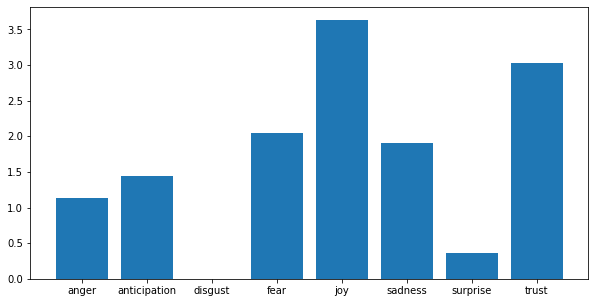

In [63]:
plt.figure(figsize=(10, 5))

plt.bar(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'] ,score_emo(sentence))
plt.show()

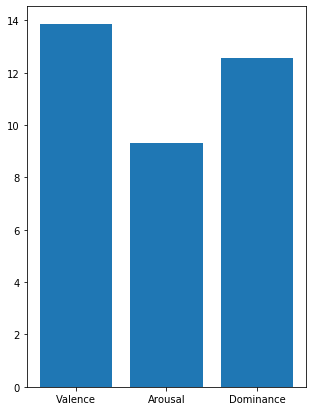

In [27]:
plt.figure(figsize=(5, 7))

plt.bar(['Valence', 'Arousal', 'Dominance'] ,score_vad(sentence))

plt.show()

In [ ]:
#OUTPUT : score_vad(sentence) or score_emo(sentence)

In [ ]:
#pickle

In [68]:
from nltk.corpus import wordnet

data=[]
corpuso=clean_text(sentence)
corpuso=corpuso.split(' ')
corpuso=remove_stopwords(corpuso)
corpuso=corpuso.split(' ')

for i in range(0, len(corpuso)):
    for syn in wordnet.synsets(corpuso[i]):
        synonyms = []
        antonyms = []
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
   
    k=[synonyms, antonyms]
    data.append(k)

In [69]:
pd.DataFrame(data, columns=["Synonym", "Antonym"], index=corpuso)

,Synonym,Antonym
lifetime,"[life, lifetime, life-time, lifespan]",[]
dedicated,"[consecrated, consecrate, dedicated]",[desecrated]
struggle,"[contend, fight, struggle]",[]
african,[African],[]
people,[people],[]
fought,"[crusade, fight, press, campaign, push, agitate]",[]
white,[white],[]
domination,"[domination, mastery, supremacy]",[]
fought,"[crusade, fight, press, campaign, push, agitate]",[]
black,"[black, smutty]",[]
